In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import sys
import warnings
warnings.filterwarnings('ignore')

In [38]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야함.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [39]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당.
a = get_font_family()

# 폰트설정
plt.rc("font", family = a)

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# ggplot으로 그래프 스타일 설정
#plt.style.use("ggplot")

In [56]:
# 막대 그래프 넓이 조절
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# RFM

In [44]:
## 승규님 RFM 최종 csv 불러오기

RFM_Result = pd.read_csv('./RFM_완성본.csv') 

In [45]:
RFM_Result

,USER_ID,Recency,Frequency,Monetary,Recency_R,Frequency_F,Monetary_M
0,224,29635200.0,2,16394.3,5,3,3
1,232,27820800.0,23,190537.5,4,5,5
2,342,26265600.0,1,9018.2,4,1,2
3,565,27302400.0,2,8558.3,4,3,2
4,729,21427200.0,1,9018.2,3,1,2
...,...,...,...,...,...,...,...
165419,1830551,31536000.0,1,1182.2,5,1,1
165420,1830570,31536000.0,1,1182.2,5,1,1
165421,1830580,31536000.0,1,1182.2,5,1,1
165422,1830589,31536000.0,1,1182.2,5,1,1


In [46]:
RFM_Result["Total_Score"] = RFM_Result["Recency_R"] + RFM_Result["Frequency_F"] + RFM_Result["Monetary_M"] 

In [47]:
RFM_Result.sort_values(by = "Total_Score", ascending=False, inplace = False)

,USER_ID,Recency,Frequency,Monetary,Recency_R,Frequency_F,Monetary_M,Total_Score
39333,931139,30067200.0,16,144290.6,5,5,5,15
76759,1360898,31536000.0,37,342690.1,5,5,5,15
13400,534403,28598400.0,8,64309.3,5,5,5,15
13404,534474,30585600.0,17,127036.2,5,5,5,15
149635,1728813,30585600.0,9,81163.4,5,5,5,15
...,...,...,...,...,...,...,...,...
108502,1544796,9331200.0,1,7376.1,1,1,1,3
108500,1544788,9244800.0,1,1182.2,1,1,1,3
28880,784227,777600.0,1,1182.2,1,1,1,3
108498,1544781,9244800.0,1,1182.2,1,1,1,3


4     19538
5     15791
7     15262
6     14122
11    13308
13    12677
15    12311
8     11640
10    11420
12    11369
9     10494
3     10370
14     7122
Name: Total_Score, dtype: int64


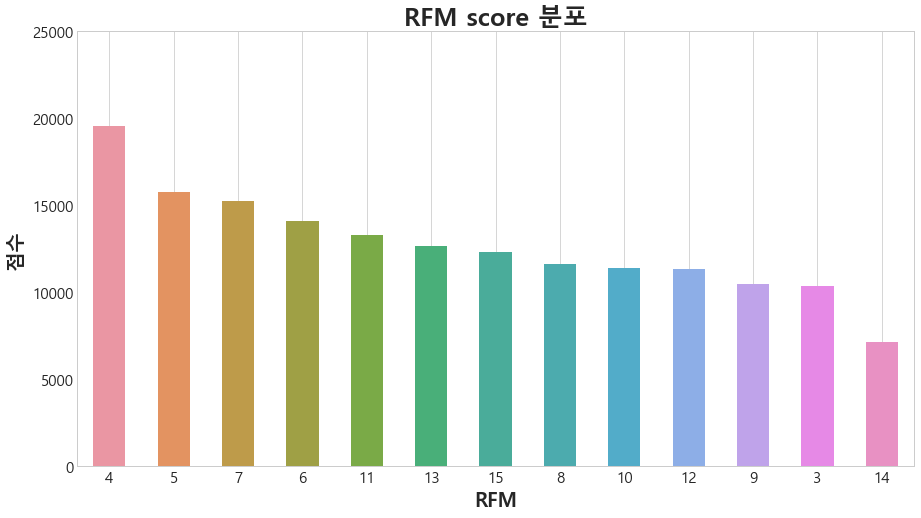

In [66]:
# RFM 전체 점수 barplotb

#plt.figure(figsize=(25,12))
fig, ax = plt.subplots(1,1, figsize = (15,8))
sns.set_palette("Paired", 9)
sns.countplot(x=RFM_Result['Total_Score'],
              data=RFM_Result,
              order = RFM_Result['Total_Score'].value_counts().index,
              ax =ax)
change_width(ax, .50)
plt.grid()
plt.title('RFM score 분포', fontsize=25, fontweight = 'bold')
plt.ylabel('점수', fontsize=20, fontweight = 'bold')
plt.xlabel('RFM', fontsize=20, fontweight = 'bold')
plt.tick_params(axis = "x", labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
plt.ylim(0,25000)

point = RFM_Result['Total_Score'].value_counts()
print(point)
# for i in range(point.shape[0]):
#     ax.text(x = i, y = point[i]+5000, s = f"{point[i]}명", fontdict = {'size' : 10}, horizontalalignment = 'center')

plt.show()

RFM 4점을 가진 유저가 제일 많음  
그 다음으로는 5,7,6,8점 순이다  
모두의 주차장 고객점수가 높지 않은편인것 같다  
이유를 찾아봐야 할듯  

### 4점 유저 경향(유저수 1위)

In [67]:
result_s4 = RFM_Result.loc[(RFM_Result['Total_Score']==4) & (RFM_Result['Frequency_F'] != 1)]
result_s4

,USER_ID,Recency,Frequency,Monetary,Recency_R,Frequency_F,Monetary_M,Total_Score


4점 유저를 보니 최근성과 구매점수는 1~2점으로 분포되어 있지만,  
방문횟수는 1점밖에 없다.  
이것은 보통 앱 사용을 한번하고 다시 돌아오지 않는 유저들이 많다는 의미.  

### 5점 유저 경향(2위)

In [68]:
result_s5 = RFM_Result.loc[(RFM_Result['Total_Score']==5)]
result_s5

,USER_ID,Recency,Frequency,Monetary,Recency_R,Frequency_F,Monetary_M,Total_Score
10,2840,14256000.0,1,9018.2,2,1,2,5
16,3517,15638400.0,1,9018.2,2,1,2,5
48,10918,15552000.0,1,9018.2,2,1,2,5
49,10946,16243200.0,1,9018.2,2,1,2,5
54,11611,15292800.0,1,9018.2,2,1,2,5
...,...,...,...,...,...,...,...,...
150486,1733151,25056000.0,1,1182.2,3,1,1,5
150488,1733158,25056000.0,1,1182.2,3,1,1,5
150491,1733177,25056000.0,1,1182.2,3,1,1,5
150492,1733181,25056000.0,1,1182.2,3,1,1,5


#### 혹시나 5점 유저도 방문횟수 점수가 1점만 있는지 확인

In [69]:
result_s5.loc[(result_s5['Frequency_F'] != 1)]

,USER_ID,Recency,Frequency,Monetary,Recency_R,Frequency_F,Monetary_M,Total_Score
406,33993,11059200.0,2,2364.4,1,3,1,5
660,50110,2592000.0,2,2364.4,1,3,1,5
671,51328,10886400.0,2,2364.4,1,3,1,5
1277,86826,2937600.0,2,2364.4,1,3,1,5
1350,90843,8640000.0,2,2364.4,1,3,1,5
...,...,...,...,...,...,...,...,...
109298,1547861,10540800.0,2,2364.4,1,3,1,5
109457,1548467,9849600.0,2,2364.4,1,3,1,5
109592,1549103,10972800.0,2,2364.4,1,3,1,5
110133,1551211,10540800.0,2,2364.4,1,3,1,5


#### 5점 유저 15791 중 방문횟수 점수가 1점 초과인 유저는 514명

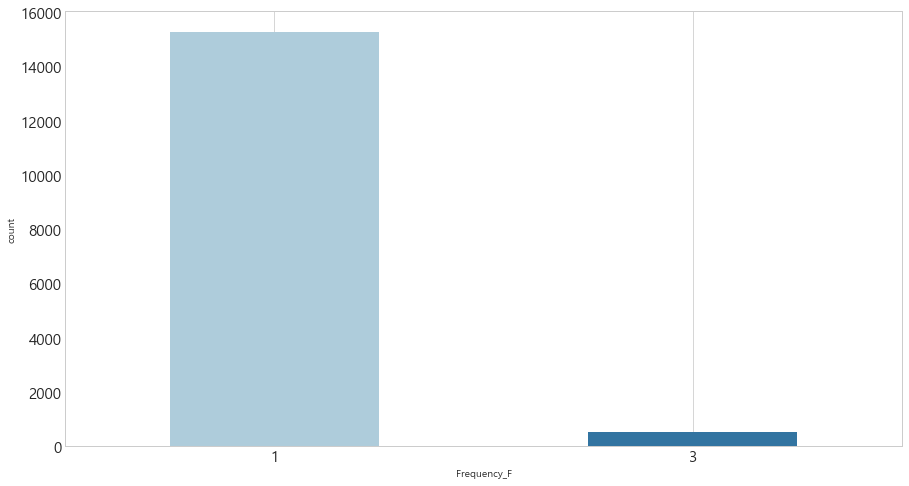

In [71]:
#plt.figure(figsize=(25,12))
fig, ax = plt.subplots(1,1, figsize = (15,8))
sns.set_palette("Paired", 9)
sns.countplot(x=result_s5['Frequency_F'], data=result_s5 ,ax =ax)
change_width(ax, .50)
plt.grid()
plt.tick_params(axis = "x", labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
plt.show()

5점 유저도 방문횟수가 1점밖에 없을까? 싶었지만  
방문횟수 3점인 유저가 있었다. 이 의미는, 앱을 2번은 사용했다는 의미  
많은 유저들이 앱을 한번 사용 후, 돌아오지 않았지만, 그 다음 많은 유저들이 한번 더 방문했음  
다시 방문했을 이유를 알아보면 좋을 것 같음  

### 승규님 데이터를 사용했을 때도 5점 유저 중 방문횟수가 2점인 유저는 없었다.  
### 아마도 아람님 말씀처럼 방문을 1회만 한 경우가 많아서 2점이 없는 경우인 것 같다.

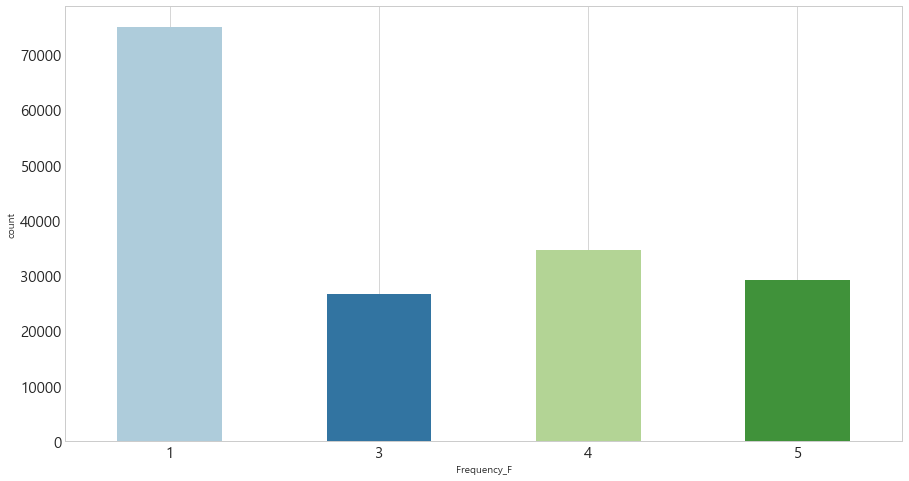

In [73]:
# 전체 RFM에서 방문횟수(Frequency_F)의 점수 분포 확인

fig, ax = plt.subplots(1,1, figsize = (15,8))
sns.set_palette("Paired", 9)
sns.countplot(x=RFM_Result['Frequency_F'], data=RFM_Result ,ax =ax)
change_width(ax, .50)
plt.grid()
plt.tick_params(axis = "x", labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
plt.show()

### 역시 전체 RFM의 방문횟수를 봐도 2점은 없는게 확인됨  

## 원본 데이터와 merge

In [75]:
df = pd.read_csv('./실전db_after_2013.csv') 

df_new = pd.merge(RFM_Result, df, how='inner', on='USER_ID')
df_new = df_new[['USER_ID','JOIN_DATE','D_TYPE','STORE_ID','GOODS_TYPE','DATE','COUNT','AD1','Total_Score']]
df_new

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,Total_Score
0,224,2013-12-16,AA,92510,A,2020-01-12,1,J,11
1,224,2013-12-16,AA,181833,C,2020-12-09,1,J,11
2,232,2013-12-17,BB,109555,C,2020-01-19,1,GJ,14
3,232,2013-12-17,BB,28018,C,2020-01-26,1,JRR,14
4,232,2013-12-17,BB,28018,C,2020-01-27,1,JRR,14
...,...,...,...,...,...,...,...,...,...
877807,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,7
877808,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,7
877809,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,7
877810,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,7
